# Train script for Ladder VAE model

### imports

In [1]:
%matplotlib inline

from torch.autograd import Variable
from torch import optim
from torch.utils.data import DataLoader
import torch

import sys
sys.path.append("../../Modules")
sys.path.append("../../Datasets")

# local imports
from train import train
from helpers import nll_loss
from models import LadderCNNVAE
from ToyDatasets.timeSeries import Sinusoids

## Define dataset loader

In [2]:
batch_size = 32
num_steps = 16
dataset_size = 5000
num_classes = 10

data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size,quantization=num_classes),batch_size=batch_size,shuffle=True)
valid_data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size,quantization=num_classes),batch_size=batch_size,shuffle=True)

batch_loader = iter(data_loader)
valid_batch_loader = iter(valid_data_loader)

## Define model

In [3]:
model = LadderCNNVAE(input_size=1,hidden_sizes=[256,128,64],latent_sizes=[64,32,16],recon_hidden_size=256,output_size=num_classes,use_softmax=True)
print("Number of trainable parameters {}".format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# test forward pass
try:
    initial_batch = batch_loader.next()
    x = Variable(initial_batch).type(torch.FloatTensor).transpose(1,0)
    test,_ = model(x)
    assert (test.shape[0] == x.shape[0] and test.shape[1] == x.shape[1] and test.shape[2] == num_classes)
    print("Forward pass succesfull")
except:
    print("Error in forward pass. Output should have shape: {} but had {}".format(x.contiguous().view(-1).shape,test.view(-1).shape))

Number of trainable parameters 761770
Forward pass succesfull


## Define optimizer and loss

In [4]:
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(),lr=learning_rate,weight_decay=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode="min",factor=0.5,verbose=True,cooldown=200)

## Run trainer


Train (1 2%) elbo: -1.8537 r_loss: -1.8537 kl: 385.2183 aux_loss: 0.0000 beta 0.00e+00
Valid (1 2%) elbo: -1.5330 r_loss: -1.5330 kl: 651.9501 aux_loss: 0.0000 beta 0.00e+00

Train (2 4%) elbo: -1.4763 r_loss: -1.4213 kl: 269.2520 aux_loss: 0.0000 beta 2.04e-04
Valid (2 4%) elbo: -1.3451 r_loss: -1.3050 kl: 196.6461 aux_loss: 0.0000 beta 2.04e-04

Train (3 6%) elbo: -1.3224 r_loss: -1.2580 kl: 157.7473 aux_loss: 0.0000 beta 4.08e-04
Valid (3 6%) elbo: -1.2061 r_loss: -1.1486 kl: 140.7940 aux_loss: 0.0000 beta 4.08e-04

Train (4 8%) elbo: -1.2484 r_loss: -1.1730 kl: 123.0725 aux_loss: 0.0000 beta 6.12e-04
Valid (4 8%) elbo: -1.1830 r_loss: -1.1074 kl: 123.4138 aux_loss: 0.0000 beta 6.12e-04

Train (5 10%) elbo: -1.1879 r_loss: -1.1010 kl: 106.4352 aux_loss: 0.0000 beta 8.16e-04
Valid (5 10%) elbo: -1.2314 r_loss: -1.1445 kl: 106.4605 aux_loss: 0.0000 beta 8.16e-04

Train (6 12%) elbo: -1.1528 r_loss: -1.0526 kl: 98.1491 aux_loss: 0.0000 beta 1.02e-03
Valid (6 12%) elbo: -0.9676 r_loss:


Train (48 96%) elbo: -0.9339 r_loss: -0.6089 kl: 33.8763 aux_loss: 0.0000 beta 9.59e-03
Valid (48 96%) elbo: -0.8460 r_loss: -0.5335 kl: 32.5802 aux_loss: 0.0000 beta 9.59e-03

Train (49 98%) elbo: -0.9451 r_loss: -0.6164 kl: 33.5470 aux_loss: 0.0000 beta 9.80e-03
Valid (49 98%) elbo: -0.9166 r_loss: -0.5847 kl: 33.8831 aux_loss: 0.0000 beta 9.80e-03

Train (50 100%) elbo: -0.9355 r_loss: -0.6009 kl: 33.4593 aux_loss: 0.0000 beta 1.00e-02
Valid (50 100%) elbo: -0.8938 r_loss: -0.5746 kl: 31.9250 aux_loss: 0.0000 beta 1.00e-02


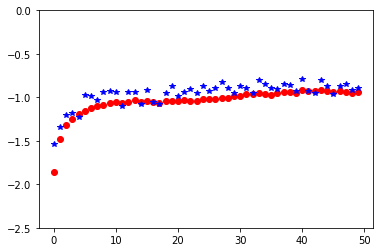

In [5]:
# use at least 50 iterations to get good results
train(data_loader,valid_data_loader,model,optimizer,scheduler,loss_fn=nll_loss,kl_loss_fn=None,n_iters=50,use_softmax=True,max_beta=1e-2,print_every=1,plot_pred=False)

In [6]:
#torch.save(model.state_dict(),"../../Saved_models/ToyDataset/LadderCNNVAE_nll_best.pt")

## Model results:

### Model 1
with the following settings: 

hidden_sizes=[256,128,64], latent_sizes=[64,32,16], recon_hidden_size=256, with 761770 trainable parameters

